In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from tqdm import tqdm

In [3]:
from IPython.display import IFrame, display
file = 'Lectures/MonteCarlo.pdf'
IFrame(file, width=550, height=400)

Queremos calcular el segundo momento de la distribución usando el método de Montecarlo.
$$ x \sim exp(4) $$ 
$$ f(x) = \frac{1}{4}e^{\frac{-x}{4}} $$  
$$ E(x^{2}) = \int_{0}^{\infty}\frac{1}{4} x^{2} e^{\frac{-x}{4}} = 32$$
Hacer cambio de variable $y = \frac{1}{1+x}$

In [5]:
def FunctionExp(y):
    
    if(y.any() != 0):
        return ( (1/y - 1)**2 * np.exp( -(1/y - 1)/4 ) ) / (4*y**2)
    else:
        return 0.

def IntegralExacta():
    return 32.

In [6]:
def MCIntegral(N = 100):
    x = np.random.rand(N)
    return np.sum(FunctionExp(x))/N

In [10]:
n_intentos = 8
puntos = np.int_(np.logspace(2,6,n_intentos))
diferencias = np.ones(n_intentos)

for i in range(n_intentos):
    a = IntegralExacta()
    b = MCIntegral(N = puntos[i])
    diferencias[i] = np.abs( (a-b)/a )

print(diferencias)

[0.12702212 0.31107512 0.03603595 0.01651535 0.0205389  0.02150515
 0.00471912 0.00228469]


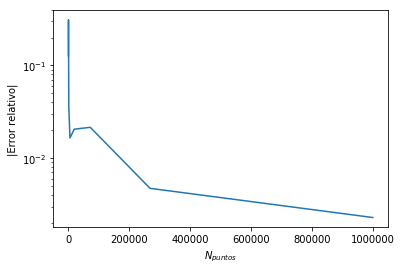

In [11]:
plt.plot(puntos, diferencias)
#plt.loglog()
plt.yscale('log')
plt.xlabel("$N_{puntos}$")
plt.ylabel("|Error relativo|")
plt.show()

En general es posible utilizar los puntos muestrales que siguen una dsitribución $g(x)$ para integrar una función $f(x)$. La siguiente aproximación de satisface:

$$ \frac{\int g(x)f(x)dx}{\int g(x)dx} = < f(x) > \approx \frac{1}{N} \sum_{i=1}^{N} f(x_{i}) $$,

donde $g(x)$ es la función de densidad de probabilidad, que podría no estar normalizada. Por ejemplo, $\int_{0}^{\infty} e^{-x} sin(x) dx$ puede ser estimada usando la densidad de probabilidad de la exponencial y promediando el valor de $sin(x)$ en esos puntos.

In [26]:
def f(x):
    return np.sin(x)

def IntegralExacta():
    return 0.5

def MCIntegral(N = 100):
    #x = np.random.rand( N )
    x = np.random.exponential( size = N )
    return np.sum(f(x))/N

In [27]:
print(MCIntegral( 10000 ))

0.5020351398371031


In [28]:
n_intentos = 8
puntos = np.int_(np.logspace(2,6,n_intentos))
diferencias = np.ones(n_intentos)

for i in range(n_intentos):
    a = IntegralExacta()
    b = MCIntegral(N = puntos[i])
    diferencias[i] = np.abs( (a-b)/a )  

print(diferencias)

[0.10487166 0.05268181 0.02299241 0.00164172 0.00419884 0.00437853
 0.00119864 0.001099  ]


Text(0,0.5,'|Error|')

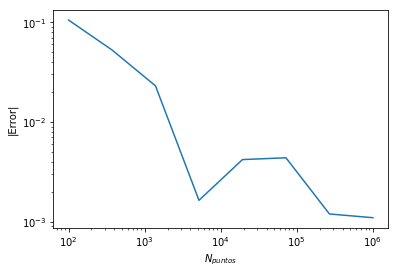

In [29]:
plt.plot(puntos, diferencias)
plt.loglog()
plt.xlabel("$N_{puntos}$")
plt.ylabel("|Error|")